![University Malaya](https://www.um.edu.my/images/img-logo-UM.png)

# Enhanced Dynamic Quantum Clustering based on Von Neumann Entropy

**Sayed Mohammad Mahdi Sadrnezhaad and Prof. Dr. Chu Kiong Loo**

*Department of Artificial Intelligence, Faculty of Computer Science and Information Technology*



## Theory

### Parzen-Windows estimation

$$ 
\psi_i(\vec{x})=e^{-\frac{(\vec{x}-\vec{x_i})^2}{2\sigma^2}}  \Rightarrow \psi_ = \sum_i \psi_i
$$

Conventional Scale-Space with Probability distribution:
- maxima $\vec{x_i}$ : center of cluster
- $ \sigma \propto $ The number & locational distribution of members

### Quantum Cluster

$$
H \psi \equiv \Big( - \frac{\sigma ^ 2}{2} \bigtriangledown^2 + V(\vec{x}) \Big) \psi = E_0 \psi
$$

- Ground State ($\psi$)
- $ V(\vec{x}) $: inextrically bound to the system of data points

$\psi$ maxima when $V(\vec{x})$ local minima: A cluster

$$
\text{Data Point: } \vec{x_i} \text{ where for cluster } i \space (\psi_i(x)) \Rightarrow \vec{x_i} = \langle\psi_i\mid\vec{x}\mid\psi_i\rangle
$$

### Dynamic Quantum Clustering

$$
V(\vec{x}) \rightarrow 
i \frac{\partial \psi_i\big(\vec{x_i},t \big)}{\partial t} 
= H \psi_i\big(\vec{x_i},t \big) 
= \big( -\frac{\sigma^2}{2m} + V(\vec{x}) \big)\psi_i\big(\vec{x_i},t \big)
$$

$ m \equiv	\frac{1}{\sigma^2} \rightarrow \text{ lowest energy eigne-states} \rightarrow \psi = \sum_i{\psi_i}$ 

- Same as Classical gradiant descent: Same minima, same cluster
- Map original data to matrix:
    - analytical: Reduce the complexity to Schrodinger for involve matrix of $N \times N $ where $ N \leqslant $ number of data dimensions 
    - easy to evolution: matrix production (parallel)
    - reduction is fast
    - time: animated
- Introduce $ m \ne \frac{1}{\sigma} $ : lowering $ \sigma $
    - larger number of minima for $V(\vec{x})$: hidden layer in data
    - effiecent tunneling
    - degenerate potential minima

### Problems

* No control metric or measure for learning process: Need to stop clustering manually when the cluster's shape is visible
* Lack of a calculation method to count the number of clusters
* Quantum fluctuation

### Von Neumann Entropy Enhancement

**Objective** : To identify a measure when the learning happens

**Idea**: Entropy in the clustered form of system should be minimum

$$
S = -tr\big(\rho ln \rho \big) 
\text{ where } \rho = \sum_j \mu_j \mid j \rangle\langle j \mid\ \text{ is density matrix }
$$

We can simplify the equations to:

$$
S = -\sum_j \mu_j ln(\mu_j) = - \sum c_j^2  ln(c_j^2) \text{ where }
\mid \psi \rangle = \sum_j \mid x \rangle\langle j \mid j \rangle = \sum_j c_j \mid j \rangle
$$

We can show:

$$ S = - \Sigma_i P_i ln (P_i) \text{ where }
 P_i = (\langle \psi_i \lvert \psi_i \rangle)^2 = \langle \psi_i(t) \lvert N(t)^\dagger N(t) \lvert \psi_i(t) \rangle  $$




## Setup

In [2]:
from google.colab import drive
import sys
import os

drive.mount('/content/drive/')
sys.path.append('/content/drive/MyDrive/EDQC/dqc')

Mounted at /content/drive/


### Initialization

In [3]:
%matplotlib inline

import numpy   as np
import pandas  as pd

import matplotlib.pyplot as plt
import seaborn as sns

from   model.dqc import DQC
import model.base_dqc as dqc

from utils.dataset import read_uci
from utils.visualization import animator

from IPython.display import Image
from IPython.core.display import HTML

### Data: Thyroid
P. Fränti and S. Sieranoja, "K-means properties on six clustering benchmark datasets", 
**Applied Intelligence**, 48 (12), 4743-4759, December 2018.

<img src="https://cs.joensuu.fi/sipu/datasets/thyroid.png" alt="Thyroid" width="400" height="400" border="5" align="left">

In [4]:
url = 'https://cs.joensuu.fi/sipu/datasets/thyroid.txt'
directory = '/content/drive/MyDrive/EDQC/data/uci/thyroid/'

In [5]:
data = read_uci(url=url, directory=directory, sep="  ")

In [6]:
data.shape

(215, 5)

In [7]:
data.head()

,0,1,2,3,4
0,3195023,3455331,3497964,3068822,3206710
1,3651455,3412754,4131996,3248619,3603214
2,4716462,4051411,3638860,3150548,2946503
3,3347167,2433481,3075276,3150548,3058020
4,3042879,2859252,3004828,3166893,2859768


In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=5, random_state=0)
df = pca.fit_transform(data)

In [10]:
df.shape

(215, 5)

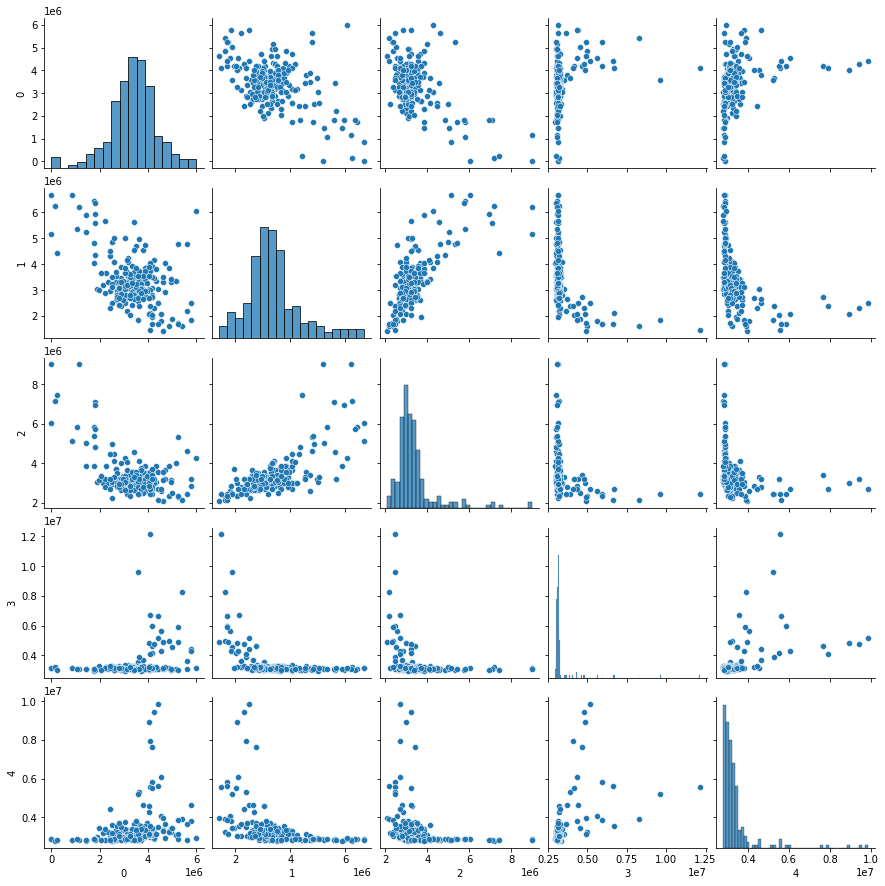

In [11]:
sns.pairplot(data)

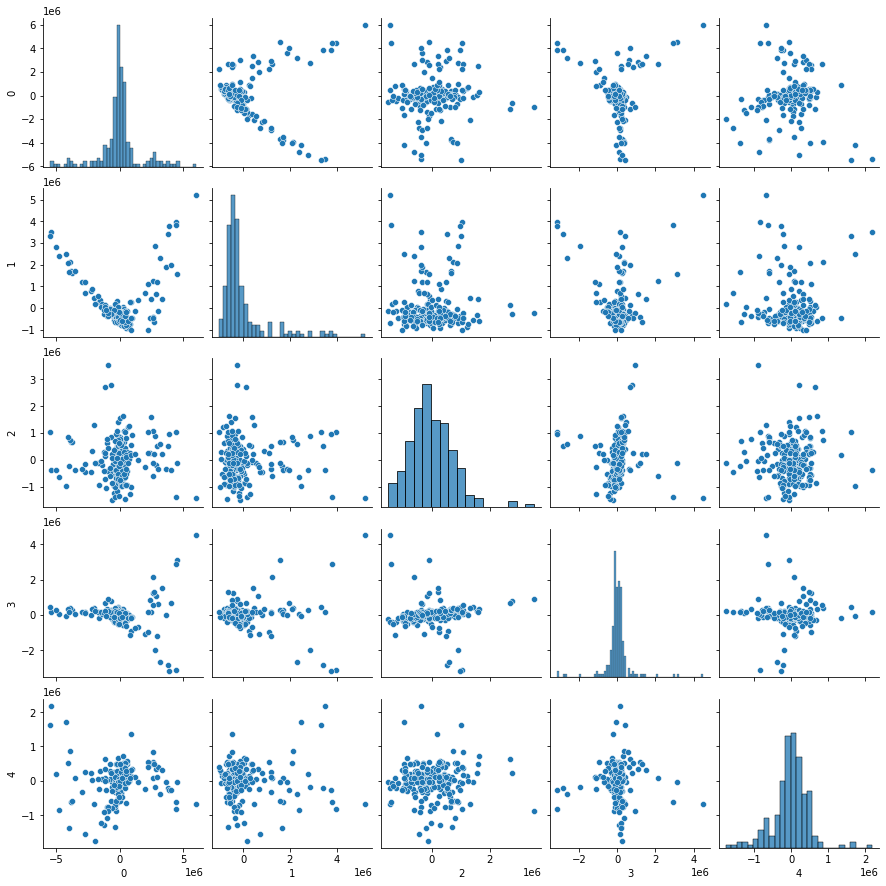

In [12]:
sns.pairplot(pd.DataFrame(df))

In [13]:
df

array([[ -368909.47470858,  -173763.09268886,   -86698.58345053,
         -119527.97412261,    72208.97047329],
       [ -222140.95684767,   323125.65784813,   503350.08363898,
         -143720.29129171,   501743.37632757],
       [ -145114.33729758,  -537506.24829628,  1410097.30767154,
          452429.46785147,   -47790.61274471],
       ...,
       [  453199.95976756,  -353592.64575951,  -925177.57946262,
         -480149.00103489,   364694.74376324],
       [  817984.38390934,   291242.12740921, -1272832.61678881,
        -1125553.35886106,    77647.09084005],
       [  484969.68386863,  -192550.54003981,  -938373.02686847,
         -621959.14556032,   293915.56767772]])

In [14]:
colors = []
for i in range(215):
  if i >= 100:
    colors.append('r')
  else:
    colors.append('b')

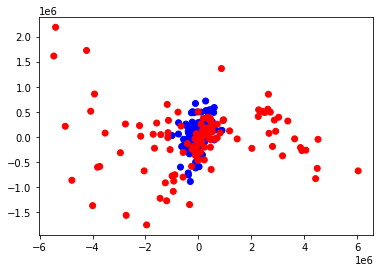

In [94]:
plt.scatter(x=pd.DataFrame(df[:,0]), y=pd.DataFrame(df[:,4]), color=colors)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       215 non-null    int64
 1   1       215 non-null    int64
 2   2       215 non-null    int64
 3   3       215 non-null    int64
 4   4       215 non-null    int64
dtypes: int64(5)
memory usage: 8.5 KB


## Model

In [17]:
# Initialization of data

thyroid = DQC(pd.DataFrame(df))

SIGMA = 0.05
M = 0.07

### #1. Calculation of Martix N

$$ N_{ij} = \langle	{\psi_i}\lvert{\psi_j}\rangle $$

In [18]:
%time thyroid.calculate_N(SIGMA)
N = np.array(thyroid.N)

CPU times: user 103 ms, sys: 212 ms, total: 315 ms
Wall time: 91.7 ms


In [19]:
thyroid.N.shape

(215, 215)

### #2. Calculation of Martix H and X

$$ H_{ij} = \langle	{\psi_i}\lvert H \lvert {\psi_j}\rangle  \Rightarrow H^{tr}$$
$$ X_{ij} = \langle	{\psi_i}\lvert X \lvert {\psi_j}\rangle $$
in the ortonormal eigenstates of N.

In [20]:
data_fit = np.array(thyroid.data_fit)

%time H = dqc.calculate_H(data_fit,SIGMA,0.07)

CPU times: user 1.54 s, sys: 213 ms, total: 1.75 s
Wall time: 1.52 s


In [21]:
%time H = dqc.basis_transform(H,N)

CPU times: user 185 ms, sys: 421 ms, total: 605 ms
Wall time: 162 ms


In [22]:
%time X = dqc.calculate_X(data_fit,0.07)
%time X = dqc.basis_transform(X,N,is_expectation=True)

CPU times: user 1.51 s, sys: 622 ms, total: 2.13 s
Wall time: 1.49 s
CPU times: user 251 ms, sys: 546 ms, total: 796 ms
Wall time: 211 ms


In [23]:
H.shape, X.shape

((215, 215), (5, 215, 215))

### #3. Find eigenvectors and eigenvalues for $H^{tr}$


Finding eigenvector and eigenvalues for $H^{tr}$  construct  
$$\lvert\psi_i(t)\rangle = e^{-itH^{tr}}\lvert\psi\rangle \Rightarrow
   i\frac{\partial}{\partial t}\lvert\psi_i(t)\rangle =H^{tr}\lvert\psi_i\rangle $$ where $\lvert\psi_i(t=0)\rangle =\lvert\psi_i\rangle$

In [24]:
%time P,H = dqc.diagonalize_H(H)

CPU times: user 95.2 ms, sys: 150 ms, total: 245 ms
Wall time: 63 ms


### #4. Calculate Trajectory

$$ \langle 
\overrightarrow{x}_i(t) \rangle = \langle \psi_i \lvert e^{itH^{tr}} \overrightarrow{X} e^{-itH^{tr}} \lvert \psi_i\rangle$$

In [25]:
%time traj,N_traj = dqc.trajectory(df,P,H,X,N,steps=10000,delta=10**4,sigma=SIGMA,m=M,stride=50)

CPU times: user 57.7 s, sys: 21.8 s, total: 1min 19s
Wall time: 20.3 s


### #5. Animation

In [26]:
if not os.path.exists(directory):
        os.mkdir(directory)
        
os.chdir(directory)

In [27]:
%time _tmp = dqc.plot_steps(traj)
del(_tmp)

CPU times: user 48.6 s, sys: 48.7 s, total: 1min 37s
Wall time: 1min 55s


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [28]:
animator()

### #6. von Neuman Entropy

$$ S = - \Sigma_i P_i ln (P_i) $$ 

$$ P_i = (\langle \psi_i \lvert \psi_i \rangle)^2 = \langle \psi_i(t) \lvert N(t)^\dagger N(t) \lvert \psi_i(t) \rangle  $$



In [29]:
S = dqc.reverse_entropy(traj, N_traj)

Text(0, 0.5, 'Reverse Entropy (1/S)')

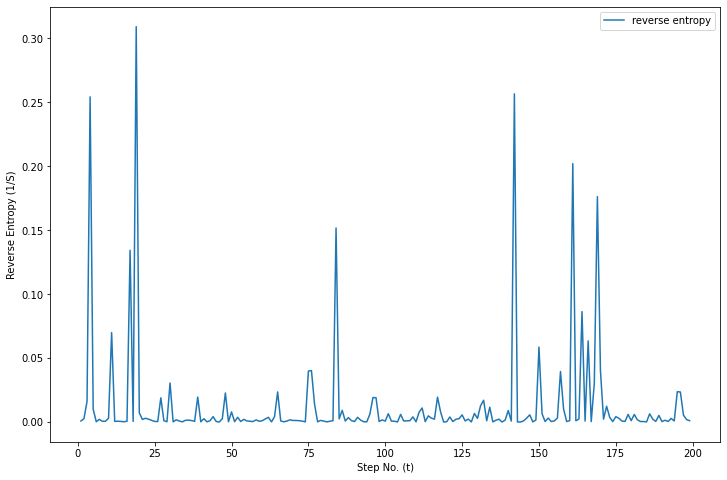

In [30]:
ax = pd.DataFrame(S, columns=['reverse entropy']).plot(figsize=(12,8), )
ax.set_xlabel("Step No. (t)")
ax.set_ylabel("Reverse Entropy (1/S)")

In [31]:
def vector(r):
    dimension = r.shape[0]
    x = [[] for i in range(r.shape[1])]
    for i in range(dimension):
        _r = r[i].diagonal()
        _r = np.real(_r).astype(np.float64)
        for j in range(r.shape[1]):
            x[j].append(_r[j])        
    return np.array(x)


In [32]:
!pip install hypertools

     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 1.2MB 23.7MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=f4c9db70bb0ff6dd754f745695e96af3a515db85e5ee14cef125a1075bd2bfaa
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=3f92fb82057bbe5f1a6695ab14a69fd5c95737f8a05ae0f586d49ad8de579ba0
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [33]:
import hypertools as hyp

In [34]:
def hyperplot(step, cluster=10):
  hyp.plot(pd.DataFrame([traj[step,:,i, i] for i in range(traj.shape[2])]).apply(np.real), fmt='.')
  try:
    hyp.plot(np.real(traj[step].diagonal()), '.', n_clusters=cluster, animate=True)
  except:
    pass

#### Revert Entropy Evolution Due Steps
* Minimum of entropy as picks
* The clustered state should be most ordered when entropy is minimal, means the system state is explaining clustered representation of data.
* Changing of entropy due to Quantum fluctuation
* Diffent ways data can illustrated by different picks

## Study Results

#### Step 0. Initial State
$ S^{-1}_0\rightarrow 0 \Rightarrow S \propto \infty $

In [35]:
S[0]

-inf

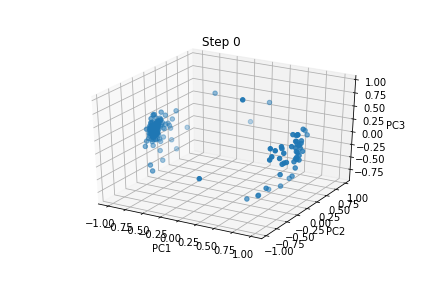

In [36]:
Image('step_0.png')

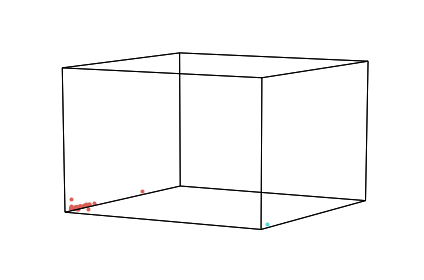

In [37]:
hyp.plot(np.real(np.conjugate(traj[0].diagonal()) * traj[0].diagonal()), '.', n_clusters=2)

#### Step 20. Orbitary chosen step
* Not optimal clustered data
* High entropy

In [38]:
S[20]**-1

137.19375881487068

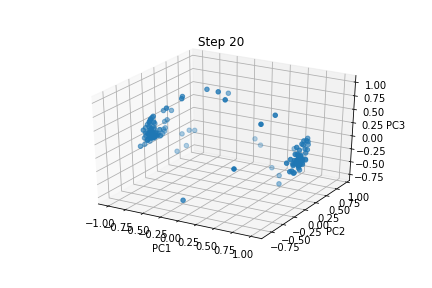

In [39]:
Image('step_'+str(20)+'.png')

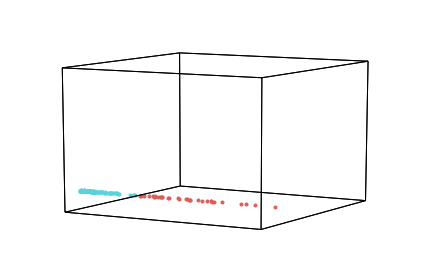

In [40]:
hyp.plot(np.real(np.conjugate(traj[20].diagonal()) * traj[20].diagonal()), '.', n_clusters=2)

#### Clustered data, minimum of entropy
* Clusters are visible
* No visible outlayers
* Detection of clusters is independent of representation of data in specific features

In [41]:
S.argmax(), S[S.argmax()]**-1

(19, 3.234022031926952)

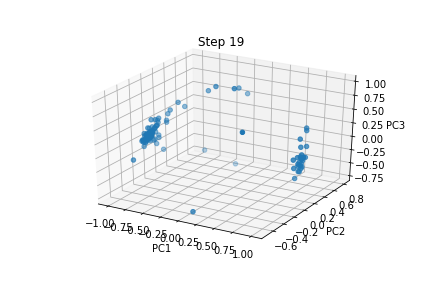

In [42]:
Image('step_'+str(S.argmax())+'.png') 

In [57]:
S1 = S.copy()
S1.sort()
1/S1[-2]

3.8961985565270574

In [61]:
np.where(S == S1[-2])

(array([142]),)

In [74]:
np.where(np.abs(S - S[1:].mean()) < 0.0005   ), 1/S1[100]

((array([131]),), 649.7040726334604)

In [70]:
1/S[131]

78.24077126628006

Text(0, 0.5, 'Number of instances')

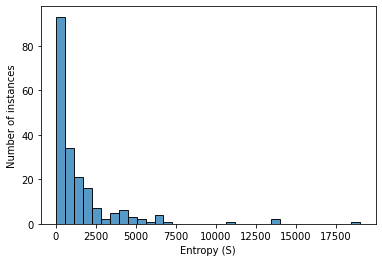

In [80]:
ax = sns.histplot(1/S[1:])
ax.set_xlabel("Entropy (S)")
ax.set_ylabel("Number of instances")

In [86]:
S[1:].argmin(), S[1:][S[1:].argmin()]**-1

(45, 19025.36588404292)

In [89]:
1/S[46]

19025.36588404292

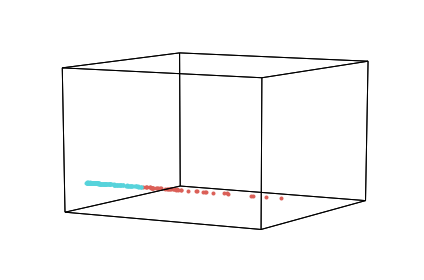

In [43]:
hyp.plot(np.real(np.conjugate(traj[132].diagonal()) * traj[132].diagonal()), '.', n_clusters=2)

In [53]:
1/S[153]

319.5824714874986

In [54]:
1/S[180]

890.4173640934594

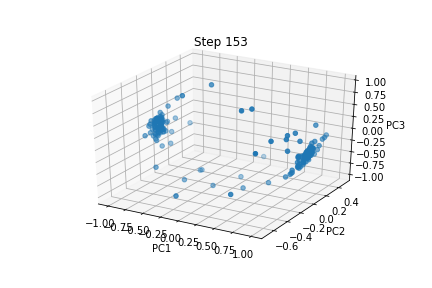

In [44]:
Image('step_'+str(153)+'.png') 

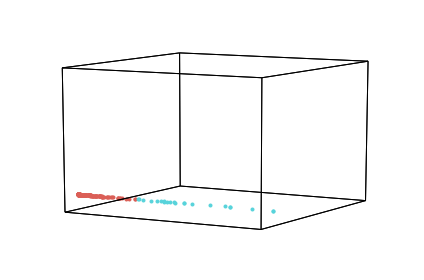

In [45]:
hyp.plot(np.real(np.conjugate(traj[153].diagonal()) * traj[153].diagonal()), '.', n_clusters=2)

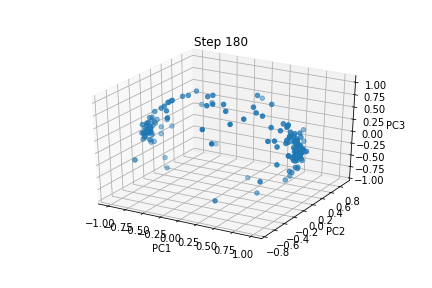

In [46]:
Image('step_'+str(180)+'.png') 

## References

[1] M. Weinstein, D. Horn, Physical Review E, 80, 06617, (2009).

[2] E. Aldana-Bobadilla, A. Kuri-Morales, Entropy, 17, (2015), 151-180; doi:10.3390/e17010151).

[3] M. Weinstein, F. Meirer, A. Hume, Ph. Sciau, A. Mehta, D. Horn, “Analyzing Big Data with Dynamic Quantum Clustering”, arXiv.org,Physics, Data Analysis, Statistics, and Probability, (2013).
[4] G. G. Rigatos, “Stochastic Processes and Neural Modelling: Quantum Harmonic Oscillator Dynamics in Neural Structures”, Neural Process Letter, 32, Issue 2, (2010), 167-199.

[5] M. Weinstein, D. Horn, “Method for Discovering Relationships in Data by Dynamic Quantum Mechanic Clustering”, U.S. Patent 15032 750, (January 29, 2015).

[6] P. Wittek, “Quantum Machine Learning: What Quantum Computing Means to Data Mining”, Elsevier Inc., San Diego, Chapter 10, (2014).

[7] P. Wittek, “High-performance dynamic quantum clustering on graphics processors”, Journal of Computational Physics, 233, (2013), 262–271.

[8] M. Weinstein, “Strange Bedfellows: Quantum Mechanics and Data Mining”, Nuclear Physics B - Proceedings Supplements, 199, Issue 1, (February 2010), 74–84.

[9] Emanuele Di Buccio, Giorgio Maria Di Nunzio, “Envisioning Dynamic Quantum Clustering in Information Retrieval”, (Quantum Interaction, Springer Berlin Heidelberg, 2011), 211- 216.

[10] M.Weinstein, A.Heifetz, R.Klann, “Detection of nuclears ources in search surveyusing dynamic quantum clustering of gamma-ray spectral data", The European Physical Journal Plus, 129, 239, (2014).

[11] A. Coates, A. Y. Ng, “Learning feature representations with k-means”, Neural Networks: Tricks of the Trade, 2nd edition, Springer, 561-580, (2012).